In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import sklearn
from sklearn import preprocessing

In [3]:
df = pd.read_csv('results.csv')
df.rename(columns={'Primary streaming service': 'Primary_Streaming_Service'}, inplace=True)
df.rename(columns={'Hours per day': 'Hours_per_day'}, inplace=True)
df.rename(columns={'While working': 'While_working'}, inplace=True)
df.rename(columns={'Fav genre':'Favgenre'}, inplace=True)
df.rename(columns={'Foreign languages':'ForeignLanguages'}, inplace=True)
df.rename(columns={'Frequency [Classical]':'Classical'}, inplace=True)
df.rename(columns={'Frequency [Country]':'Country'}, inplace=True)
df.rename(columns={'Frequency [EDM]':'EDM'}, inplace=True)
df.rename(columns={'Frequency [Folk]':'Folk'}, inplace=True)
df.rename(columns={'Frequency [Gospel]':'Gospel'}, inplace=True)
df.rename(columns={'Frequency [Hip hop]':'HipHop'}, inplace=True)
df.rename(columns={'Frequency [Jazz]':'Jazz'}, inplace=True)
df.rename(columns={'Frequency [K pop]':'Kpop'}, inplace=True)
df.rename(columns={'Frequency [Latin]':'Latin'}, inplace=True)
df.rename(columns={'Frequency [Lofi]':'Lofi'}, inplace=True)
df.rename(columns={'Frequency [Metal]':'Metal'}, inplace=True)
df.rename(columns={'Frequency [Pop]':'Pop'}, inplace=True)
df.rename(columns={'Frequency [R&B]':'RnB'}, inplace=True)
df.rename(columns={'Frequency [Rap]':'Rap'}, inplace=True)
df.rename(columns={'Frequency [Rock]':'Rock'}, inplace=True)
df.rename(columns={'Frequency [Video game music]':'VGM'}, inplace=True)
df.rename(columns={'Music effects':'Music_Effects'}, inplace=True)

# Preprocessing

In [4]:
df.drop(['Timestamp','Permissions','BPM','Primary_Streaming_Service','Exploratory','ForeignLanguages','Instrumentalist','Composer','While_working'],axis=1,inplace=True)
df=df.dropna()
df.head()

,Age,Hours_per_day,Favgenre,Classical,Country,EDM,Folk,Gospel,HipHop,Jazz,...,Pop,RnB,Rap,Rock,VGM,Anxiety,Depression,Insomnia,OCD,Music_Effects
2,18.0,4.0,Video game music,Never,Never,Very frequently,Never,Never,Rarely,Rarely,...,Rarely,Never,Rarely,Rarely,Very frequently,7.0,7.0,10.0,2.0,No effect
3,61.0,2.5,Jazz,Sometimes,Never,Never,Rarely,Sometimes,Never,Very frequently,...,Sometimes,Sometimes,Never,Never,Never,9.0,7.0,3.0,3.0,Improve
4,18.0,4.0,R&B,Never,Never,Rarely,Never,Rarely,Very frequently,Never,...,Sometimes,Very frequently,Very frequently,Never,Rarely,7.0,2.0,5.0,9.0,Improve
5,18.0,5.0,Jazz,Rarely,Sometimes,Never,Never,Never,Sometimes,Very frequently,...,Very frequently,Very frequently,Very frequently,Very frequently,Never,8.0,8.0,7.0,7.0,Improve
6,18.0,3.0,Video game music,Sometimes,Never,Rarely,Sometimes,Rarely,Rarely,Sometimes,...,Rarely,Rarely,Never,Never,Sometimes,4.0,8.0,6.0,0.0,Improve


In [5]:
#First was done for Music_Effects, which will be used later as the "target" in the model.
data = {'Music_Effects': ["Worsen", "No effect", "Improve", "No effect", "Worsen","Improve"]}
df_music = pd.DataFrame(data)

mapping = {"Worsen": 2, "No effect": 0, "Improve": 1}

df['Music_Effects'] = df['Music_Effects'].map(mapping).astype(int)

data2 = {'Rock': ["Never", "Rarely", "Sometimes", "Very frequently", "Never", "Rarely", "Sometimes", "Very frequently"]}
df_rock = pd.DataFrame(data2)

mapping = {"Never": 1, "Rarely": 0, "Sometimes":3 , "Very frequently":2}

df['Rock'] = df['Rock'].map(mapping)

data2 = {'Classical': ["Never", "Rarely", "Sometimes", "Very frequently", "Never", "Rarely", "Sometimes", "Very frequently"]}
df_rock = pd.DataFrame(data2)

mapping = {"Never": 1, "Rarely": 0, "Sometimes":3 , "Very frequently":2}

df['Classical'] = df['Classical'].map(mapping)

data2 = {'Country': ["Never", "Rarely", "Sometimes", "Very frequently", "Never", "Rarely", "Sometimes", "Very frequently"]}
df_rock = pd.DataFrame(data2)

mapping = {"Never": 1, "Rarely": 0, "Sometimes":3 , "Very frequently":2}

df['Country'] = df['Country'].map(mapping)

data2 = {'VGM': ["Never", "Rarely", "Sometimes", "Very frequently", "Never", "Rarely", "Sometimes", "Very frequently"]}
df_rock = pd.DataFrame(data2)

mapping = {"Never": 1, "Rarely": 0, "Sometimes":3 , "Very frequently":2}

df['VGM'] = df['VGM'].map(mapping)

data2 = {'EDM': ["Never", "Rarely", "Sometimes", "Very frequently", "Never", "Rarely", "Sometimes", "Very frequently"]}
df_rock = pd.DataFrame(data2)

mapping = {"Never": 1, "Rarely": 0, "Sometimes":3 , "Very frequently":2}

df['EDM'] = df['EDM'].map(mapping)

data2 = {'Folk': ["Never", "Rarely", "Sometimes", "Very frequently", "Never", "Rarely", "Sometimes", "Very frequently"]}
df_rock = pd.DataFrame(data2)

mapping = {"Never": 1, "Rarely": 0, "Sometimes":3 , "Very frequently":2}

df['Folk'] = df['Folk'].map(mapping)

data2 = {'Gospel': ["Never", "Rarely", "Sometimes", "Very frequently", "Never", "Rarely", "Sometimes", "Very frequently"]}
df_rock = pd.DataFrame(data2)

mapping = {"Never": 1, "Rarely": 0, "Sometimes":3 , "Very frequently":2}

df['Gospel'] = df['Gospel'].map(mapping)

data2 = {'Rap': ["Never", "Rarely", "Sometimes", "Very frequently", "Never", "Rarely", "Sometimes", "Very frequently"]}
df_rock = pd.DataFrame(data2)

mapping = {"Never": 1, "Rarely": 0, "Sometimes":3 , "Very frequently":2}

df['Rap'] = df['Rap'].map(mapping)



In [6]:
data2 = {'HipHop': ["Never", "Rarely", "Sometimes", "Very frequently", "Never", "Rarely", "Sometimes", "Very frequently"]}
df_rock = pd.DataFrame(data2)

mapping = {"Never": 1, "Rarely": 0, "Sometimes":3 , "Very frequently":2}

df['HipHop'] = df['HipHop'].map(mapping)

data2 = {'RnB': ["Never", "Rarely", "Sometimes", "Very frequently", "Never", "Rarely", "Sometimes", "Very frequently"]}
df_rock = pd.DataFrame(data2)

mapping = {"Never": 1, "Rarely": 0, "Sometimes":3 , "Very frequently":2}

df['RnB'] = df['RnB'].map(mapping)

data2 = {'Pop': ["Never", "Rarely", "Sometimes", "Very frequently", "Never", "Rarely", "Sometimes", "Very frequently"]}
df_rock = pd.DataFrame(data2)

mapping = {"Never": 1, "Rarely": 0, "Sometimes":3 , "Very frequently":2}

df['Pop'] = df['Pop'].map(mapping)

data2 = {'Latin': ["Never", "Rarely", "Sometimes", "Very frequently", "Never", "Rarely", "Sometimes", "Very frequently"]}
df_rock = pd.DataFrame(data2)

mapping = {"Never": 1, "Rarely": 0, "Sometimes":3 , "Very frequently":2}

df['Latin'] = df['Latin'].map(mapping)

data2 = {'Jazz': ["Never", "Rarely", "Sometimes", "Very frequently", "Never", "Rarely", "Sometimes", "Very frequently"]}
df_rock = pd.DataFrame(data2)

mapping = {"Never": 1, "Rarely": 0, "Sometimes":3 , "Very frequently":2}

df['Jazz'] = df['Jazz'].map(mapping)

data2 = {'Kpop': ["Never", "Rarely", "Sometimes", "Very frequently", "Never", "Rarely", "Sometimes", "Very frequently"]}
df_rock = pd.DataFrame(data2)

mapping = {"Never": 1, "Rarely": 0, "Sometimes":3 , "Very frequently":2}

df['Kpop'] = df['Kpop'].map(mapping)

data2 = {'Metal': ["Never", "Rarely", "Sometimes", "Very frequently", "Never", "Rarely", "Sometimes", "Very frequently"]}
df_rock = pd.DataFrame(data2)

mapping = {"Never": 1, "Rarely": 0, "Sometimes":3 , "Very frequently":2}

df['Metal'] = df['Metal'].map(mapping)

data2 = {'Lofi': ["Never", "Rarely", "Sometimes", "Very frequently", "Never", "Rarely", "Sometimes", "Very frequently"]}
df_rock = pd.DataFrame(data2)

mapping = {"Never": 1, "Rarely": 0, "Sometimes":3 , "Very frequently":2}

df['Lofi'] = df['Lofi'].map(mapping)
#Changing it like this felt more consistent with the values remaining the same.
#Turning them into numbers will be needed later for the model.

In [7]:
df.shape
#To look how many participants there are in the dataset.

(727, 24)

In [8]:
df.isnull().sum() 
#Checking for null values left.

Age              0
Hours_per_day    0
Favgenre         0
Classical        0
Country          0
EDM              0
Folk             0
Gospel           0
HipHop           0
Jazz             0
Kpop             0
Latin            0
Lofi             0
Metal            0
Pop              0
RnB              0
Rap              0
Rock             0
VGM              0
Anxiety          0
Depression       0
Insomnia         0
OCD              0
Music_Effects    0
dtype: int64

In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 727 entries, 2 to 735
Data columns (total 24 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Age            727 non-null    float64
 1   Hours_per_day  727 non-null    float64
 2   Favgenre       727 non-null    object 
 3   Classical      727 non-null    int64  
 4   Country        727 non-null    int64  
 5   EDM            727 non-null    int64  
 6   Folk           727 non-null    int64  
 7   Gospel         727 non-null    int64  
 8   HipHop         727 non-null    int64  
 9   Jazz           727 non-null    int64  
 10  Kpop           727 non-null    int64  
 11  Latin          727 non-null    int64  
 12  Lofi           727 non-null    int64  
 13  Metal          727 non-null    int64  
 14  Pop            727 non-null    int64  
 15  RnB            727 non-null    int64  
 16  Rap            727 non-null    int64  
 17  Rock           727 non-null    int64  
 18  VGM            

In [9]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,727.0,25.143054,11.927993,10.0,18.0,21.0,28.0,89.0
Hours_per_day,727.0,3.592228,3.040567,0.0,2.0,3.0,5.0,24.0
Classical,727.0,1.341128,1.211401,0.0,0.0,1.0,3.0,3.0
Country,727.0,1.049519,0.991852,0.0,0.0,1.0,1.0,3.0
EDM,727.0,1.255846,1.057840,0.0,0.0,1.0,2.0,3.0
Folk,727.0,1.200825,1.076086,0.0,0.0,1.0,2.0,3.0
Gospel,727.0,0.973865,0.690853,0.0,1.0,1.0,1.0,3.0
HipHop,727.0,1.470426,1.194059,0.0,0.0,1.0,3.0,3.0
Jazz,727.0,1.213205,1.149891,0.0,0.0,1.0,2.0,3.0
Kpop,727.0,1.041265,0.838766,0.0,1.0,1.0,1.0,3.0


In [11]:
df.dropna(subset=['Age','Music_Effects'],inplace=True)

In [12]:
def find_outliers(column):
    q3 = df[[column]].quantile(0.75)
    q1 = df[[column]].quantile(0.25)
    t = q3 - q1
    outliers_above = q3 + 3 * t
    outliers_below = q1 - 3 * t
    return outliers_below, outliers_above

outliers_below_age, outliers_above_age = find_outliers('Age')
outliers_below_hpd, outliers_above_hpd = find_outliers('Hours_per_day')
#Looking for outliers that may be an obstacle later for the EDA.

In [13]:
print(outliers_below_age)
print(outliers_above_age)
print(outliers_below_hpd)
print(outliers_above_hpd)

Age   -12.0
dtype: float64
Age    58.0
dtype: float64
Hours_per_day   -7.0
dtype: float64
Hours_per_day    14.0
dtype: float64


In [14]:
df_drop = df.copy(deep = True)
df_agehours = df_drop.loc[~(df_drop['Age']>58.0)]
df_agehours = df_drop.loc[~(df_drop['Hours_per_day']>14.0)] #Used to take away any outliers in the dataset that can harm
#The analysis of the data.

In [15]:
df_agehours.describe()

,Age,Hours_per_day,Classical,Country,EDM,Folk,Gospel,HipHop,Jazz,Kpop,...,Pop,RnB,Rap,Rock,VGM,Anxiety,Depression,Insomnia,OCD,Music_Effects
count,719.000000,719.000000,719.000000,719.00000,719.000000,719.000000,719.000000,719.000000,719.000000,719.000000,...,719.000000,719.000000,719.000000,719.000000,719.000000,719.000000,719.000000,719.000000,719.000000,719.000000
mean,25.066759,3.415229,1.340751,1.05007,1.253129,1.201669,0.972184,1.470097,1.204451,1.036161,...,1.899861,1.353268,1.411683,1.910987,1.396384,5.851878,4.809458,3.740612,2.627260,0.792768
std,11.681759,2.517051,1.210168,0.99315,1.056832,1.077600,0.689600,1.194875,1.147205,0.835377,...,1.085990,1.138262,1.165988,0.967655,1.131980,2.782875,3.011675,3.086017,2.830053,0.460293
min,10.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,18.000000,2.000000,0.000000,0.00000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,...,1.000000,0.000000,0.000000,1.000000,0.000000,4.000000,2.000000,1.000000,0.000000,1.000000
50%,21.000000,3.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,2.000000,1.000000,1.000000,2.000000,1.000000,6.000000,5.000000,3.000000,2.000000,1.000000
75%,28.000000,4.750000,3.000000,1.00000,2.000000,2.000000,1.000000,3.000000,2.000000,1.000000,...,3.000000,2.000000,3.000000,3.000000,3.000000,8.000000,7.000000,6.000000,4.000000,1.000000
max,80.000000,14.000000,3.000000,3.00000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,...,3.000000,3.000000,3.000000,3.000000,3.000000,10.000000,10.000000,10.000000,10.000000,2.000000


In [16]:
df_agehours.kurtosis(numeric_only  = True)
#Kurtosis here is used to identify any possible outliers that can affect the entire dataset during analysis.
#Having a positive kurtosis may mean more outliers in that column of the dataset.

Age              4.305887
Hours_per_day    1.850580
Classical       -1.503763
Country         -0.299088
EDM             -0.954369
Folk            -0.953538
Gospel           2.962228
HipHop          -1.519809
Jazz            -1.146500
Kpop             0.490251
Latin            0.638611
Lofi            -1.094578
Metal           -1.069146
Pop             -0.809894
RnB             -1.335958
Rap             -1.438070
Rock            -0.426385
VGM             -1.343073
Anxiety         -0.749139
Depression      -1.136476
Insomnia        -1.027563
OCD             -0.103420
Music_Effects    0.199538
dtype: float64

# EDA

# 1. Are there any considerable correlations between mental health conditions?

In [17]:
corr = df_agehours[['Age','Hours_per_day','Anxiety','Depression','OCD','Insomnia']].corr()

<Axes: >

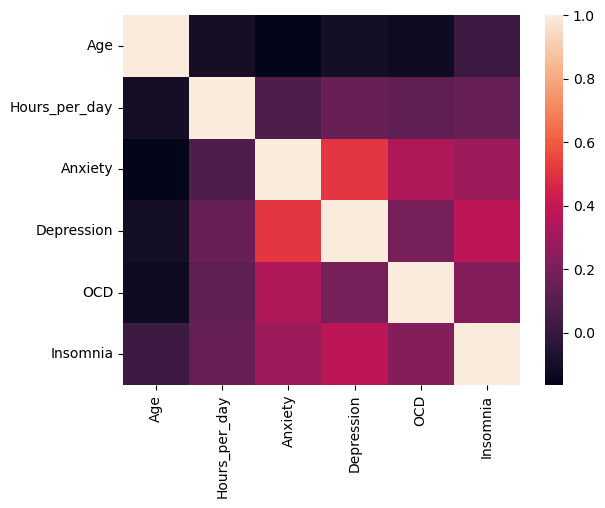

In [18]:
sns.heatmap(corr) #Looking at the heatmap, there seems to be correlation with Anxiety and Depression, and 
#moderate correlation between OCD and Anxiety as well as Depression and Insomnia
#There is no correlation between how old a person is and the hours they listen to music a day.

# 2. Does Music affect and improve one's mental health condition?

(array([0, 1, 2]), [Text(0, 0, '0'), Text(1, 0, '1'), Text(2, 0, '2')])

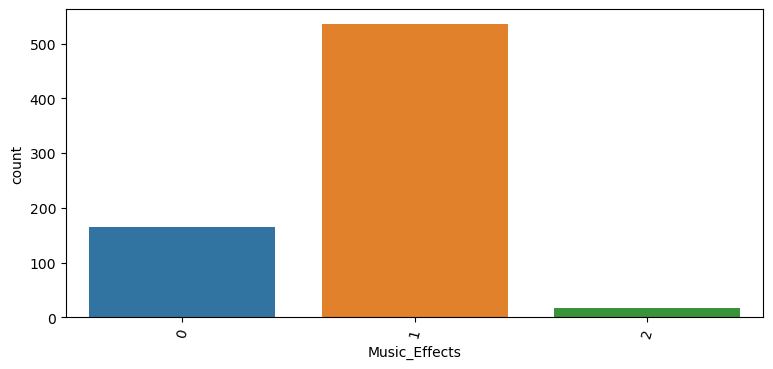

In [19]:
fig=plt.figure(figsize=(9,4))
sns.countplot(x=df_agehours['Music_Effects'])
plt.xticks(rotation=75)
#No Effect is 0, Improve is 1, and Worsen is 2
#The graph shows that music does improve the majority of the participant's mental health 
#with only the minority claiming it has worsened it.

# 3. Which Genre has the most amount of people who had it as their favourite and which had the least amount of people who had it as their favourite?

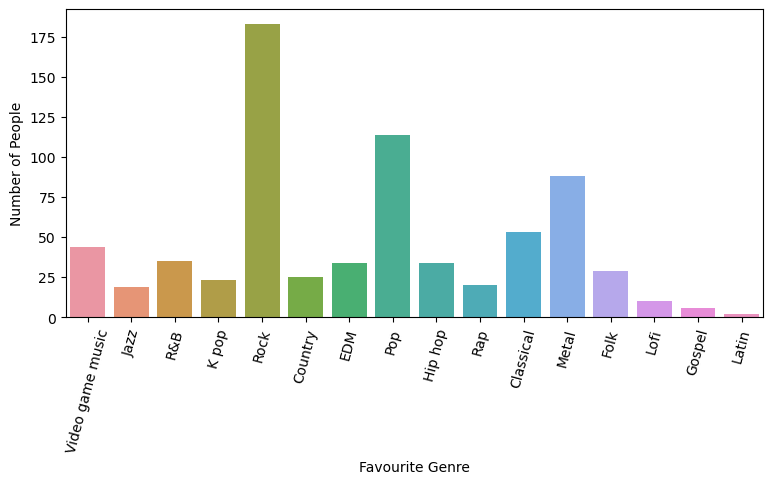

In [20]:
fig=plt.figure(figsize=(9,4))
sns.countplot(x=df_agehours['Favgenre'])
plt.xticks(rotation=75)
plt.xlabel('Favourite Genre')
plt.ylabel('Number of People')
plt.show()
#More than 175 participants have claimed that Rock is their favourite genre.
#Latin has the least number of people who had it as their favourite.

# 4. What music do people with OCD, Insomnia, Depression, and Anxiety listen to the most?

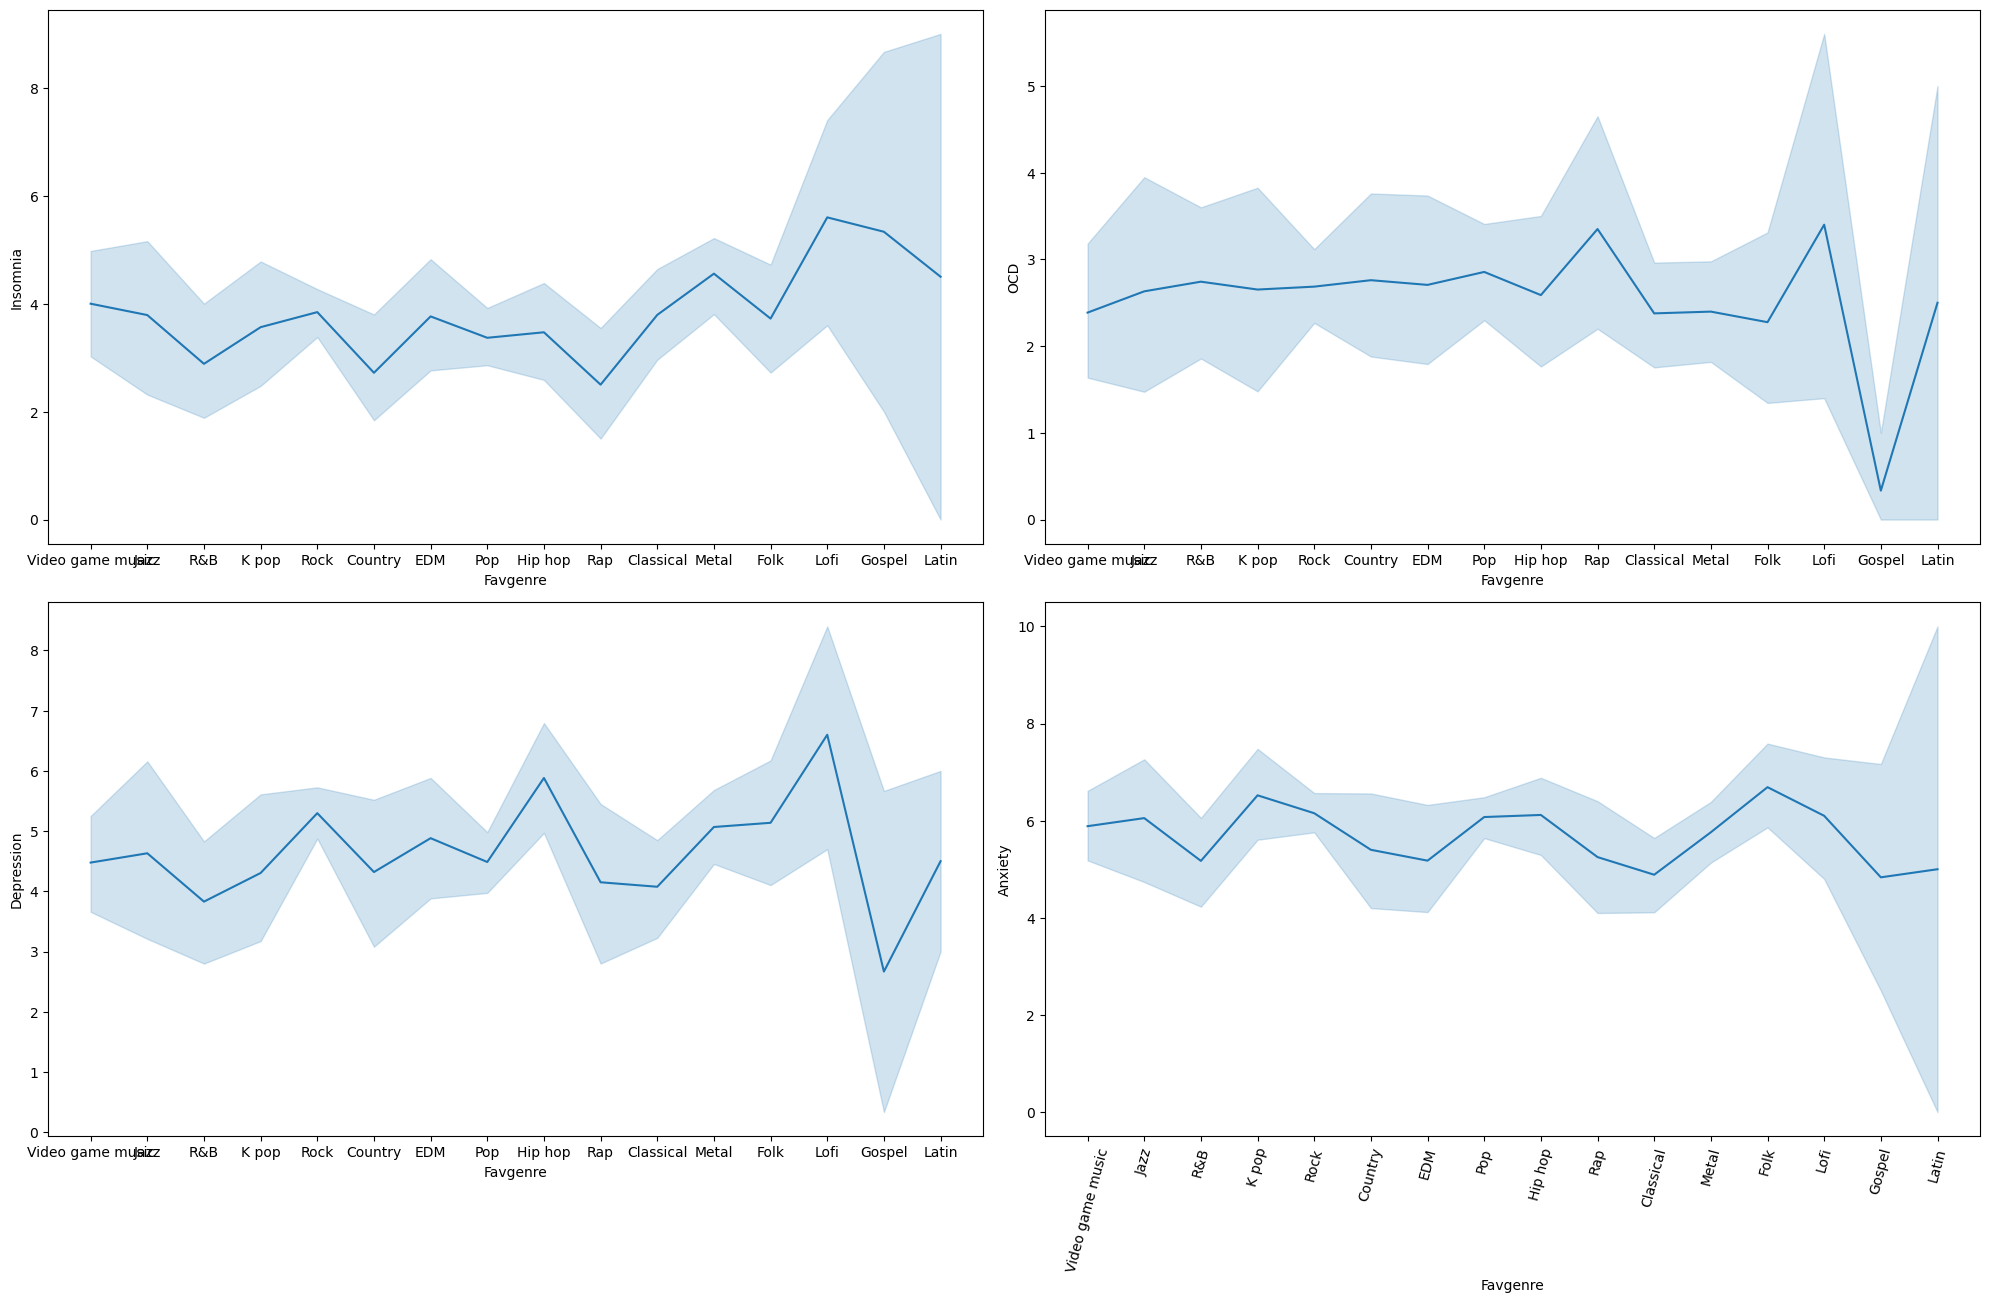

In [21]:
figure,axes=plt.subplots(2,2,figsize=(20,12))
sns.lineplot(ax=axes[0,0],x=df_agehours['Favgenre'],y=df_agehours['Insomnia'])
sns.lineplot(ax=axes[0,1],x=df_agehours['Favgenre'],y=df_agehours['OCD'])
sns.lineplot(ax=axes[1,0],x=df_agehours['Favgenre'],y=df_agehours['Depression'])
sns.lineplot(ax=axes[1,1],x=df_agehours['Favgenre'],y=df_agehours['Anxiety'])
plt.tight_layout()
plt.xticks(rotation=75)
plt.show()
#Based on the following graphs, those with Insomnia listens to Gospel music the most
#People with OCD listen to Rap and Lofi the most and Gospel music the least
#People with Depression listen to Lofi the most and Gospel music the least
#People with Anxiety listen to Kpop and Folk the most and Gospel music the least
#Gospel music seems to be the most listened to for Insomnia and the least listened to for everything else.

# 5. Which Genre improves or worsens which mental conditions?

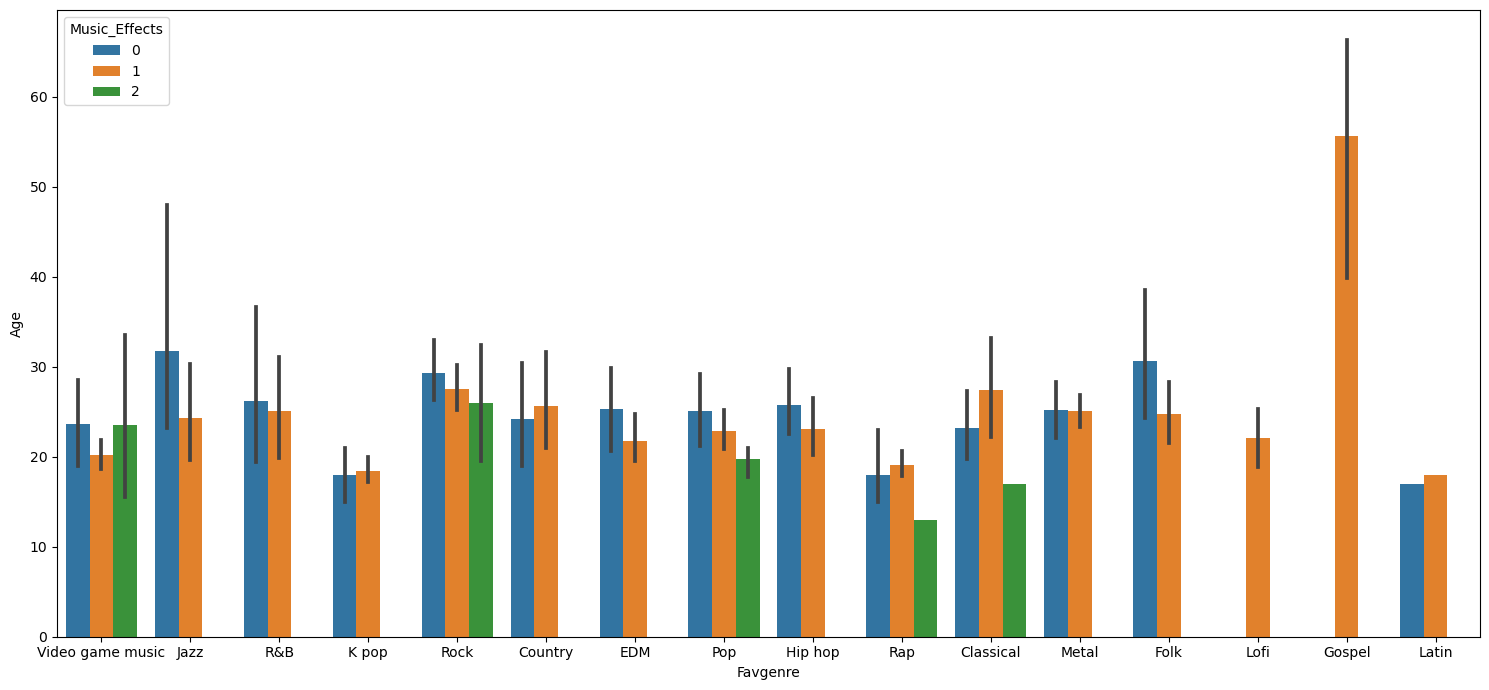

In [22]:
figure=plt.subplots(figsize=(15,7))
sns.barplot(x=df_agehours['Favgenre'],y=df_agehours['Age'],hue=df_agehours['Music_Effects'])
plt.tight_layout()
plt.show()
#Higher age groups listening to Gospel music has seen that their mental health is improved by the genre

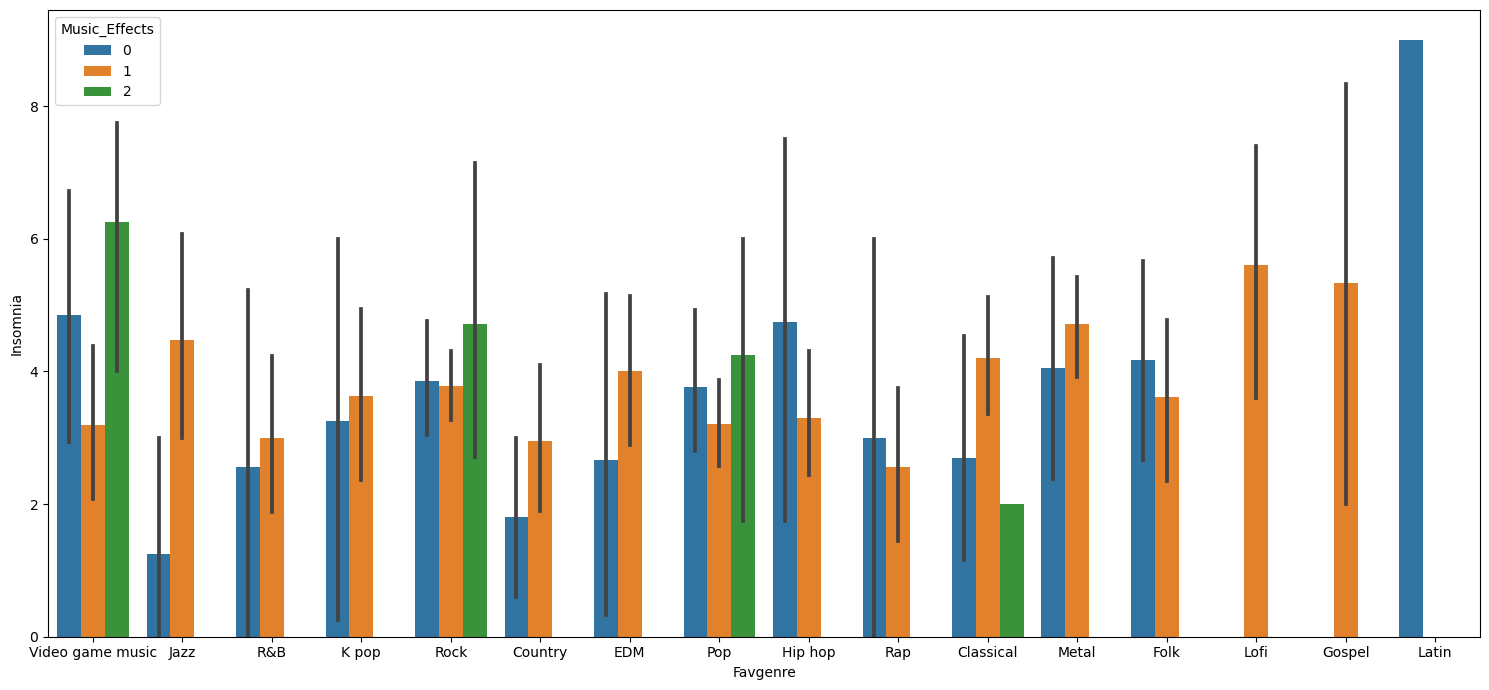

In [23]:
figure=plt.subplots(figsize=(15,7))
sns.barplot(x=df_agehours['Favgenre'],y=df_agehours['Insomnia'],hue=df_agehours['Music_Effects'])
plt.tight_layout()
plt.show()
#In this graph, it shows that Video Game Music worsens the condition of a person affected by insomnia
#On the opposite end, Lofi and Gospel has noticeably shown to somewhat improve the condition of those affected with Insomnia
#Insomnia may get more common with age alongside many other factors. People in their 20s tend to be the most active and busiest with
#their lives and may use on calmer music like Lofi while resting their minds.
#Age is another factor that may make insomnia more common to the older generation, who instead uses gospel music.

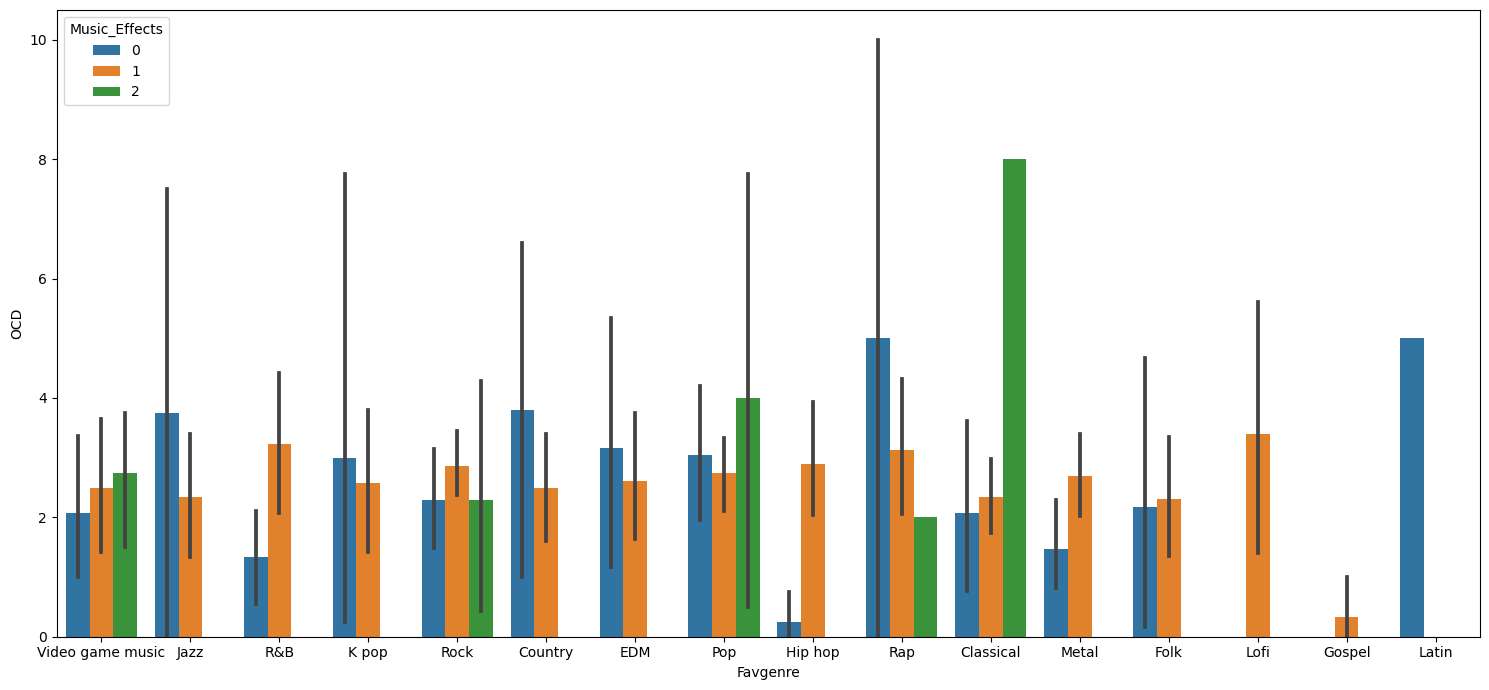

In [24]:
figure=plt.subplots(figsize=(15,7))
sns.barplot(x=df_agehours['Favgenre'],y=df_agehours['OCD'],hue=df_agehours['Music_Effects'])
plt.tight_layout()
plt.show()
#Those with OCD may be recommended not to listen to Classical due to the graph showing how it worsens the condition.
#There is no real genre of music that actually improves OCD.

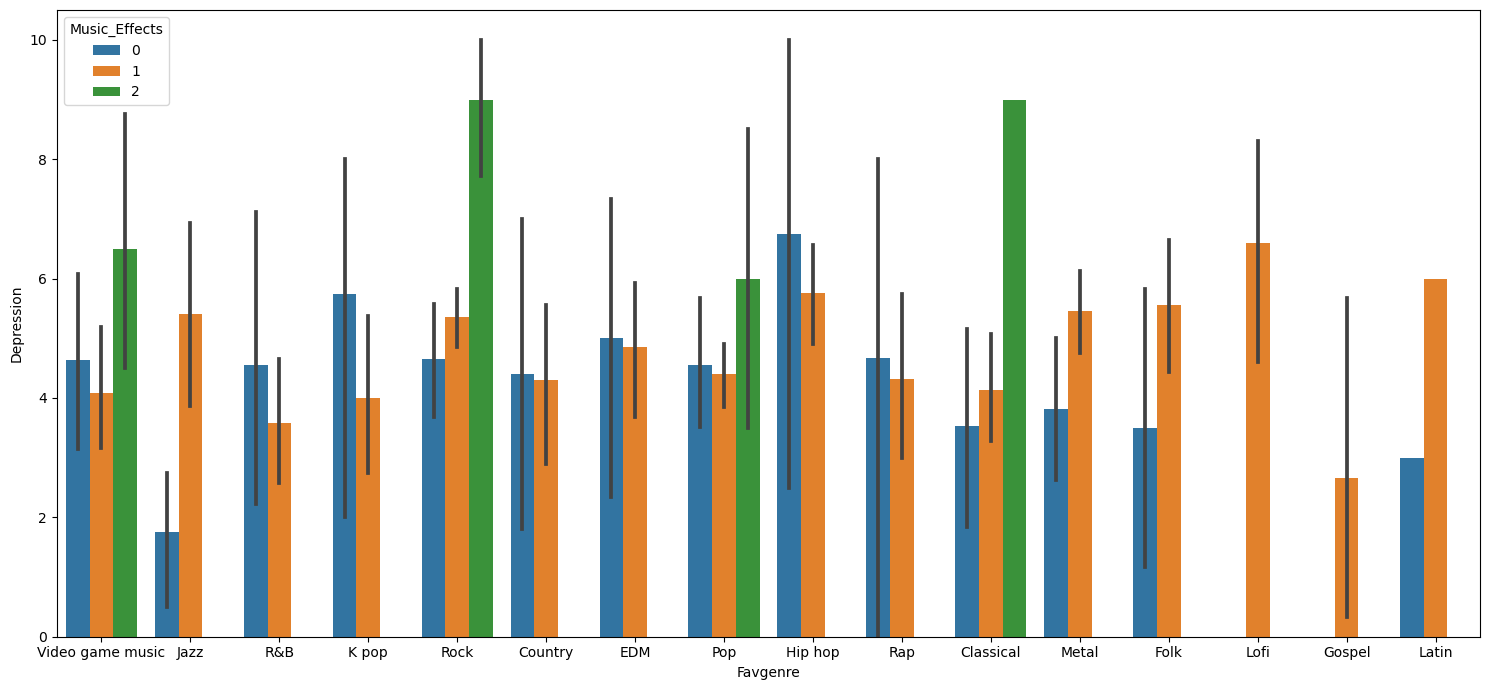

In [25]:
figure=plt.subplots(figsize=(15,7))
sns.barplot(x=df_agehours['Favgenre'],y=df_agehours['Depression'],hue=df_agehours['Music_Effects'])
plt.tight_layout()
plt.show()
#For Depression, Rock, Classical, Video game music, and Pop worsens it to a noticeable degree
#While Lofi, Hip hop, Metal, Latin, Jazz, and Folk improves the listener's condition when listened to.

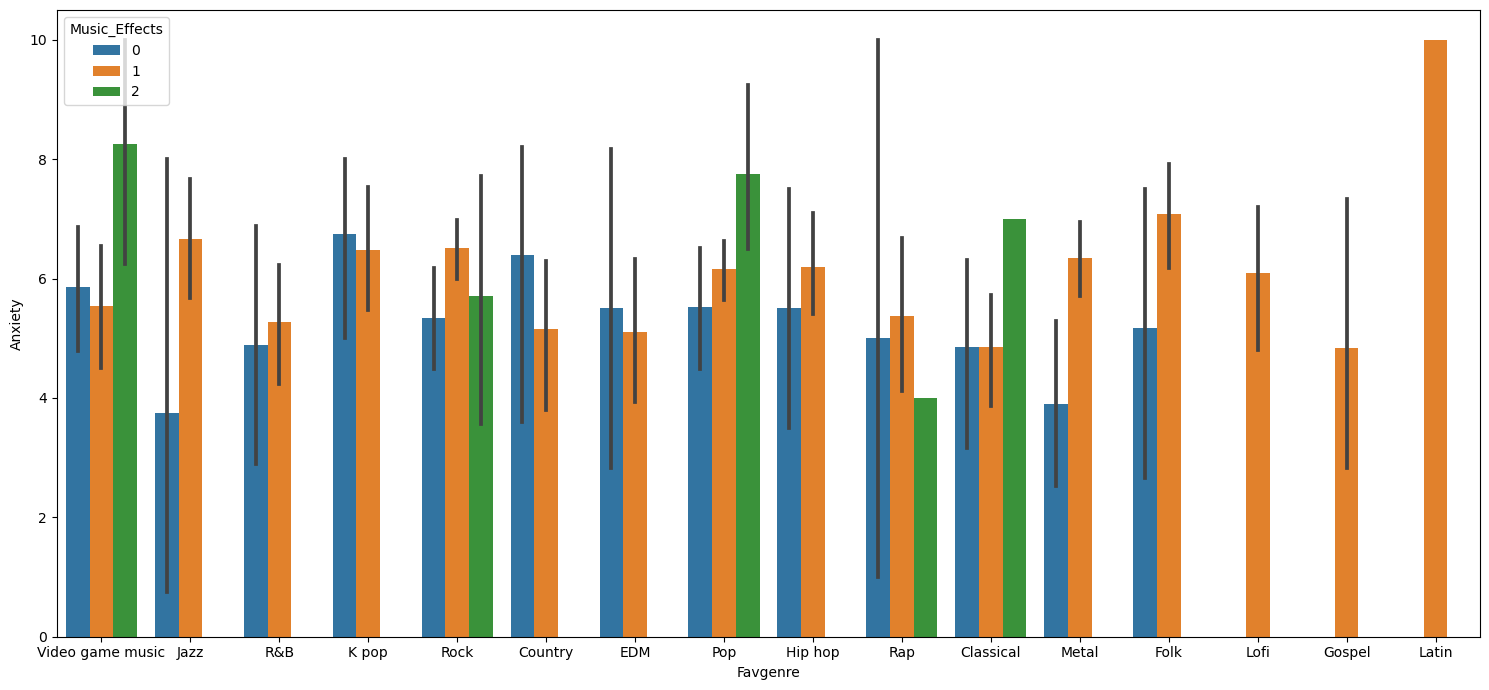

In [26]:
figure=plt.subplots(figsize=(15,7))
sns.barplot(x=df_agehours['Favgenre'],y=df_agehours['Anxiety'],hue=df_agehours['Music_Effects'])
plt.tight_layout()
plt.show()
#Latin has been shown to improve those afflicted with Anxiety alongside Folk, Metal, and Lofi.
#Video game music, Pop, and Classical seems to worsen it to a significant degree.

In [7]:
dfpp = preprocessing.LabelEncoder()
dfpp.fit(['Video game music','Jazz','R&B','K pop','Rock','Country','EDM','Hip hop','Rap','Pop','Classical','Metal','Folk','Lofi','Gospel','Latin'])
df.Favgenre = dfpp.transform(df.Favgenre)

In [8]:
X = df.drop(['Music_Effects'], axis = 1)
Y = df['Music_Effects']
X = X.astype('float32')
Y = Y.astype('float32')

In [9]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, random_state=0, test_size=0.25, shuffle=True)
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

# Model 2: Adam

If you see an EDA before this model, it meant that this model had the most consistent good results out of them.
Models are chosen per optimizer used.
Layers, epochs may change and batch sizes may be added to the model to look at results but the optimizer will be the same
for Model 2: Adam.
Only ten tests are done per model.
Test of each model may vary or be the same.

# Test 1

In [10]:
model = keras.Sequential()
model.add(layers.Dense(22, activation='relu'))
model.add(layers.Dense(21, activation='sigmoid'))
model.add(layers.Dense(1, activation='tanh'))
#Test 1 is always testing the results of using relu sigmoid and tanh alongside the optimizer. Our given metrics always accuracy
#For our loss, it will always be for binary_crossentropy.

In [11]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
history = model.fit(X_train, Y_train, validation_split=0.50, epochs=100)

Epoch 1/100
9/9 [==============================] - 1s 40ms/step - loss: 3.7435 - accuracy: 0.2169 - val_loss: 1.0863 - val_accuracy: 0.3590
Epoch 2/100
9/9 [==============================] - 0s 9ms/step - loss: 1.0401 - accuracy: 0.3529 - val_loss: 0.7356 - val_accuracy: 0.5861
Epoch 3/100
9/9 [==============================] - 0s 8ms/step - loss: 0.7921 - accuracy: 0.5588 - val_loss: 0.6166 - val_accuracy: 0.6374
Epoch 4/100
9/9 [==============================] - 0s 9ms/step - loss: 0.6733 - accuracy: 0.6397 - val_loss: 0.5823 - val_accuracy: 0.6777
Epoch 5/100
9/9 [==============================] - 0s 8ms/step - loss: 0.6309 - accuracy: 0.6949 - val_loss: 0.5634 - val_accuracy: 0.6960
Epoch 6/100
9/9 [==============================] - 0s 9ms/step - loss: 0.6041 - accuracy: 0.7132 - val_loss: 0.5510 - val_accuracy: 0.7033
Epoch 7/100
9/9 [==============================] - 0s 9ms/step - loss: 0.5838 - accuracy: 0.7279 - val_loss: 0.5426 - val_accuracy: 0.7143
Epoch 8/100
9/9 [=========

In [12]:
model.evaluate(X_test, Y_test)

6/6 [==============================] - 0s 1ms/step - loss: 0.6473 - accuracy: 0.7363


[0.6472553014755249, 0.7362637519836426]

In [13]:
model.evaluate(X_train, Y_train)
#Both evaluations for the first test has given promising results with above 70% accuracy, which we determined is
#Already good for a dataset like this one. The loss varies, however but never going above 4 like in the first model.

18/18 [==============================] - 0s 1ms/step - loss: 0.4604 - accuracy: 0.7651


[0.46036019921302795, 0.7651376128196716]

# Test 2 

In [14]:
model = keras.Sequential()
model.add(layers.Dense(22, activation='relu'))
model.add(layers.Dense(21, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))
#Two relus and 1 sigmoid is used for test 2. The epochs are lessened to 50.

In [15]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
history = model.fit(X_train, Y_train, validation_split=0.50, epochs=50)

Epoch 1/50
9/9 [==============================] - 1s 32ms/step - loss: 0.5304 - accuracy: 0.7500 - val_loss: 0.5632 - val_accuracy: 0.7070
Epoch 2/50
9/9 [==============================] - 0s 9ms/step - loss: 0.4764 - accuracy: 0.7132 - val_loss: 0.5672 - val_accuracy: 0.7253
Epoch 3/50
9/9 [==============================] - 0s 8ms/step - loss: 0.4517 - accuracy: 0.7647 - val_loss: 0.5947 - val_accuracy: 0.7289
Epoch 4/50
9/9 [==============================] - 0s 9ms/step - loss: 0.4493 - accuracy: 0.7610 - val_loss: 0.5566 - val_accuracy: 0.7289
Epoch 5/50
9/9 [==============================] - 0s 9ms/step - loss: 0.4392 - accuracy: 0.7610 - val_loss: 0.5428 - val_accuracy: 0.7289
Epoch 6/50
9/9 [==============================] - 0s 9ms/step - loss: 0.4311 - accuracy: 0.7610 - val_loss: 0.5556 - val_accuracy: 0.7289
Epoch 7/50
9/9 [==============================] - 0s 9ms/step - loss: 0.4200 - accuracy: 0.7647 - val_loss: 0.5418 - val_accuracy: 0.7289
Epoch 8/50
9/9 [=================

In [16]:
model.evaluate(X_test, Y_test)

6/6 [==============================] - 0s 2ms/step - loss: 0.7753 - accuracy: 0.7473


[0.7753320932388306, 0.7472527623176575]

In [17]:
model.evaluate(X_train, Y_train)
#It resulted in a slightly better average accuracy when evaluated but also slightly higher losses.

18/18 [==============================] - 0s 979us/step - loss: 0.4548 - accuracy: 0.7688


[0.4548049569129944, 0.7688073515892029]

# Test 3

In [27]:
model = keras.Sequential()
model.add(layers.Dense(10, activation='relu'))
model.add(layers.Dense(13, activation='sigmoid'))
model.add(layers.Dense(1, activation='tanh'))
#It's mostly the same from test 1 but with fewer layers for relu, sigmoid, and tanh. The epochs are changed to 60.

In [28]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
history = model.fit(X_train, Y_train, validation_split=0.50, epochs=60)

Epoch 1/60
9/9 [==============================] - 1s 55ms/step - loss: 12.5451 - accuracy: 0.2059 - val_loss: 11.7263 - val_accuracy: 0.2527
Epoch 2/60
9/9 [==============================] - 0s 9ms/step - loss: 11.7167 - accuracy: 0.2059 - val_loss: 10.1370 - val_accuracy: 0.2527
Epoch 3/60
9/9 [==============================] - 0s 9ms/step - loss: 8.0901 - accuracy: 0.2059 - val_loss: 3.9868 - val_accuracy: 0.2527
Epoch 4/60
9/9 [==============================] - 0s 9ms/step - loss: 2.9968 - accuracy: 0.2059 - val_loss: 1.5510 - val_accuracy: 0.2527
Epoch 5/60
9/9 [==============================] - 0s 9ms/step - loss: 1.3715 - accuracy: 0.2059 - val_loss: 1.0195 - val_accuracy: 0.2527
Epoch 6/60
9/9 [==============================] - 0s 9ms/step - loss: 1.0199 - accuracy: 0.2096 - val_loss: 0.9057 - val_accuracy: 0.2527
Epoch 7/60
9/9 [==============================] - 0s 8ms/step - loss: 0.9192 - accuracy: 0.2169 - val_loss: 0.8482 - val_accuracy: 0.2601
Epoch 8/60
9/9 [=============

In [29]:
model.evaluate(X_test, Y_test)

6/6 [==============================] - 0s 1ms/step - loss: 0.5397 - accuracy: 0.7473


[0.5397270321846008, 0.7472527623176575]

In [30]:
model.evaluate(X_train, Y_train)
#It resulted in a slightly lower average accuracy from both evaluations but less losses. This may simply be due to having
#lesser layers.

18/18 [==============================] - 0s 1ms/step - loss: 0.5011 - accuracy: 0.7431


[0.5010705590248108, 0.7431192398071289]

# Test 4

In [31]:
model = keras.Sequential()
model.add(layers.Dense(10, activation='sigmoid'))
model.add(layers.Dense(13, activation='sigmoid'))
model.add(layers.Dense(1, activation='tanh'))
#2 sigmoids and 1 tanh is done for test 4. The epochs remain unchanged.

In [32]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
history = model.fit(X_train, Y_train, validation_split=0.50, epochs=60)

Epoch 1/60
9/9 [==============================] - 1s 32ms/step - loss: 0.6367 - accuracy: 0.6875 - val_loss: 0.5968 - val_accuracy: 0.7253
Epoch 2/60
9/9 [==============================] - 0s 9ms/step - loss: 0.5488 - accuracy: 0.7610 - val_loss: 0.5545 - val_accuracy: 0.7253
Epoch 3/60
9/9 [==============================] - 0s 9ms/step - loss: 0.4993 - accuracy: 0.7610 - val_loss: 0.5385 - val_accuracy: 0.7253
Epoch 4/60
9/9 [==============================] - 0s 9ms/step - loss: 0.4765 - accuracy: 0.7610 - val_loss: 0.5358 - val_accuracy: 0.7253
Epoch 5/60
9/9 [==============================] - 0s 9ms/step - loss: 0.4651 - accuracy: 0.7610 - val_loss: 0.5379 - val_accuracy: 0.7253
Epoch 6/60
9/9 [==============================] - 0s 9ms/step - loss: 0.4596 - accuracy: 0.7610 - val_loss: 0.5411 - val_accuracy: 0.7253
Epoch 7/60
9/9 [==============================] - 0s 9ms/step - loss: 0.4594 - accuracy: 0.7610 - val_loss: 0.5451 - val_accuracy: 0.7253
Epoch 8/60
9/9 [=================

In [33]:
model.evaluate(X_test, Y_test)

6/6 [==============================] - 0s 1ms/step - loss: 0.5501 - accuracy: 0.7473


[0.5501059889793396, 0.7472527623176575]

In [34]:
model.evaluate(X_train, Y_train)
#The resulting average accuracy when evaluated is the same as the previous test but with slightly less losses.

18/18 [==============================] - 0s 1ms/step - loss: 0.4709 - accuracy: 0.7431


[0.47086265683174133, 0.7431192398071289]

# Test 5

In [41]:
model = keras.Sequential()
model.add(layers.Dense(10, activation='sigmoid'))
model.add(layers.Dense(23, activation='sigmoid'))
model.add(layers.Dense(20, activation='relu'))
model.add(layers.Dense(1, activation='tanh'))
#2 sigmoids, 1 relu, and 1 tanh is done for test five while also increasing the epochs to 70

In [42]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
history = model.fit(X_train, Y_train, validation_split=0.50, epochs=70)

Epoch 1/70
9/9 [==============================] - 1s 34ms/step - loss: 0.5372 - accuracy: 0.7279 - val_loss: 0.5547 - val_accuracy: 0.7253
Epoch 2/70
9/9 [==============================] - 0s 9ms/step - loss: 0.4616 - accuracy: 0.7610 - val_loss: 0.5922 - val_accuracy: 0.7253
Epoch 3/70
9/9 [==============================] - 0s 9ms/step - loss: 0.4743 - accuracy: 0.7610 - val_loss: 0.5882 - val_accuracy: 0.7253
Epoch 4/70
9/9 [==============================] - 0s 9ms/step - loss: 0.4685 - accuracy: 0.7610 - val_loss: 0.5732 - val_accuracy: 0.7253
Epoch 5/70
9/9 [==============================] - 0s 9ms/step - loss: 0.4615 - accuracy: 0.7610 - val_loss: 0.5545 - val_accuracy: 0.7253
Epoch 6/70
9/9 [==============================] - 0s 9ms/step - loss: 0.4616 - accuracy: 0.7610 - val_loss: 0.5495 - val_accuracy: 0.7253
Epoch 7/70
9/9 [==============================] - 0s 9ms/step - loss: 0.4594 - accuracy: 0.7610 - val_loss: 0.5564 - val_accuracy: 0.7253
Epoch 8/70
9/9 [=================

In [43]:
model.evaluate(X_test, Y_test)

6/6 [==============================] - 0s 2ms/step - loss: 0.6055 - accuracy: 0.7363


[0.6054675579071045, 0.7362637519836426]

In [44]:
model.evaluate(X_train, Y_train)
#The average accuracy is actually lower than the previous one when evaluated and with more loss than before.

18/18 [==============================] - 0s 478us/step - loss: 0.4572 - accuracy: 0.7523


[0.45715954899787903, 0.752293586730957]

# Test 6

In [45]:
model = keras.Sequential()
model.add(layers.Dense(20, activation='sigmoid'))
model.add(layers.Dense(20, activation='relu'))
model.add(layers.Dense(20, activation='relu'))
model.add(layers.Dense(1, activation='tanh'))
#1 sigmoid, 2 relus, and 1 tanh is tested alongside the epochs increasing to 80 
#A batch size of 3 is also included

In [53]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
history = model.fit(X_train, Y_train, validation_split=0.50, batch_size=3, epochs=80)

Epoch 1/80
91/91 [==============================] - 1s 5ms/step - loss: -0.1263 - accuracy: 0.8897 - val_loss: 1.0048 - val_accuracy: 0.7473
Epoch 2/80
91/91 [==============================] - 0s 3ms/step - loss: -0.3519 - accuracy: 0.9191 - val_loss: 1.2103 - val_accuracy: 0.7546
Epoch 3/80
91/91 [==============================] - 0s 3ms/step - loss: -0.3719 - accuracy: 0.9375 - val_loss: 1.1598 - val_accuracy: 0.7546
Epoch 4/80
91/91 [==============================] - 0s 3ms/step - loss: -0.3781 - accuracy: 0.9301 - val_loss: 1.3134 - val_accuracy: 0.7326
Epoch 5/80
91/91 [==============================] - 0s 3ms/step - loss: -0.3828 - accuracy: 0.9375 - val_loss: 1.1516 - val_accuracy: 0.7399
Epoch 6/80
91/91 [==============================] - 0s 3ms/step - loss: -0.3606 - accuracy: 0.9265 - val_loss: 1.2049 - val_accuracy: 0.7436
Epoch 7/80
91/91 [==============================] - 0s 3ms/step - loss: -0.3826 - accuracy: 0.9301 - val_loss: 1.1750 - val_accuracy: 0.7509
Epoch 8/80
91

In [54]:
model.evaluate(X_test, Y_test)

6/6 [==============================] - 0s 2ms/step - loss: 4.2008 - accuracy: 0.6538


[4.200812816619873, 0.6538461446762085]

In [55]:
model.evaluate(X_train, Y_train)
#The resulting average accuracy when evaluated as shown is higher than the previous one
#There are significantly more losses in this test than the previous one.

18/18 [==============================] - 0s 2ms/step - loss: 0.8963 - accuracy: 0.8404


[0.8963190317153931, 0.8403669595718384]

# Test 7

In [118]:
model = keras.Sequential()
model.add(layers.Dense(20, activation='relu'))
model.add(layers.Dense(20, activation='sigmoid'))
model.add(layers.Dense(22, activation='sigmoid'))
model.add(layers.Dense(1, activation='tanh'))
#1 relu, 2 sigmoids, and 1 tanh is included in this test.
#Epochs is reduced to 70 and batch size is reduced to 2.

In [119]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
history = model.fit(X_train, Y_train, validation_split=0.50, batch_size=2, epochs=70)

Epoch 1/70
136/136 [==============================] - 1s 4ms/step - loss: 0.5389 - accuracy: 0.7169 - val_loss: 0.5457 - val_accuracy: 0.7253
Epoch 2/70
136/136 [==============================] - 0s 2ms/step - loss: 0.4630 - accuracy: 0.7610 - val_loss: 0.5429 - val_accuracy: 0.7253
Epoch 3/70
136/136 [==============================] - 0s 2ms/step - loss: 0.4609 - accuracy: 0.7610 - val_loss: 0.5604 - val_accuracy: 0.7253
Epoch 4/70
136/136 [==============================] - 0s 2ms/step - loss: 0.4553 - accuracy: 0.7610 - val_loss: 0.5381 - val_accuracy: 0.7253
Epoch 5/70
136/136 [==============================] - 0s 2ms/step - loss: 0.4425 - accuracy: 0.7610 - val_loss: 0.5603 - val_accuracy: 0.7253
Epoch 6/70
136/136 [==============================] - 0s 2ms/step - loss: 0.4358 - accuracy: 0.7610 - val_loss: 0.5444 - val_accuracy: 0.7253
Epoch 7/70
136/136 [==============================] - 0s 2ms/step - loss: 0.4203 - accuracy: 0.7610 - val_loss: 0.5321 - val_accuracy: 0.7253
Epoch 

In [120]:
model.evaluate(X_test, Y_test)

6/6 [==============================] - 0s 2ms/step - loss: 2.2019 - accuracy: 0.7033


[2.2018656730651855, 0.7032967209815979]

In [121]:
model.evaluate(X_train, Y_train)
#The resulting average accuracy when evaluated is higher than the previous one
#The losses, while still more than the desired outcome, has lessened.

18/18 [==============================] - 0s 1ms/step - loss: 0.9489 - accuracy: 0.8055


[0.9488785266876221, 0.805504560470581]

# Test 8

In [70]:
model = keras.Sequential()
model.add(layers.Dense(21, activation='relu'))
model.add(layers.Dense(22, activation='relu'))
model.add(layers.Dense(22, activation='sigmoid'))
model.add(layers.Dense(21, activation='sigmoid'))
model.add(layers.Dense(1, activation='sigmoid'))
#2 relus and 3 sigmoids have been added.
#Batch sizes are removed and epochs are reduced to 50 again.

In [71]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
history = model.fit(X_train, Y_train, validation_split=0.50,  epochs=50)

Epoch 1/50
9/9 [==============================] - 1s 33ms/step - loss: 0.7432 - accuracy: 0.2132 - val_loss: 0.6834 - val_accuracy: 0.6960
Epoch 2/50
9/9 [==============================] - 0s 9ms/step - loss: 0.6453 - accuracy: 0.7500 - val_loss: 0.6220 - val_accuracy: 0.7253
Epoch 3/50
9/9 [==============================] - 0s 9ms/step - loss: 0.5825 - accuracy: 0.7610 - val_loss: 0.5820 - val_accuracy: 0.7253
Epoch 4/50
9/9 [==============================] - 0s 9ms/step - loss: 0.5346 - accuracy: 0.7610 - val_loss: 0.5598 - val_accuracy: 0.7253
Epoch 5/50
9/9 [==============================] - 0s 9ms/step - loss: 0.5068 - accuracy: 0.7610 - val_loss: 0.5477 - val_accuracy: 0.7253
Epoch 6/50
9/9 [==============================] - 0s 9ms/step - loss: 0.4874 - accuracy: 0.7610 - val_loss: 0.5422 - val_accuracy: 0.7253
Epoch 7/50
9/9 [==============================] - 0s 9ms/step - loss: 0.4777 - accuracy: 0.7610 - val_loss: 0.5403 - val_accuracy: 0.7253
Epoch 8/50
9/9 [=================

In [72]:
model.evaluate(X_test, Y_test)

6/6 [==============================] - 0s 2ms/step - loss: 0.5675 - accuracy: 0.7473


[0.5674605965614319, 0.7472527623176575]

In [73]:
model.evaluate(X_train, Y_train)
#The results show a lower accuracy but significantly lesser losses.

18/18 [==============================] - 0s 1ms/step - loss: 0.4707 - accuracy: 0.7431


[0.4707341492176056, 0.7431192398071289]

# Test 9

In [114]:
 model.add(layers.Dense(21, activation='sigmoid'))
model.add(layers.Dense(22, activation='sigmoid'))
model.add(layers.Dense(22, activation='relu'))
model.add(layers.Dense(21, activation='relu'))
model.add(layers.Dense(21, activation='relu'))
model.add(layers.Dense(1, activation='tanh'))
#2 sigmoids, 3 relus, and 1 tanh included.
#Epochs are increased to 90.

In [115]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
history = model.fit(X_train, Y_train, validation_split=0.50,  epochs=90)

Epoch 1/90
9/9 [==============================] - 1s 39ms/step - loss: 1.4371 - accuracy: 0.2059 - val_loss: 0.8981 - val_accuracy: 0.2527
Epoch 2/90
9/9 [==============================] - 0s 10ms/step - loss: 0.8009 - accuracy: 0.2353 - val_loss: 0.6587 - val_accuracy: 0.7253
Epoch 3/90
9/9 [==============================] - 0s 10ms/step - loss: 0.5919 - accuracy: 0.7610 - val_loss: 0.5696 - val_accuracy: 0.7253
Epoch 4/90
9/9 [==============================] - 0s 9ms/step - loss: 0.5059 - accuracy: 0.7610 - val_loss: 0.5415 - val_accuracy: 0.7253
Epoch 5/90
9/9 [==============================] - 0s 10ms/step - loss: 0.4693 - accuracy: 0.7610 - val_loss: 0.5431 - val_accuracy: 0.7253
Epoch 6/90
9/9 [==============================] - 0s 10ms/step - loss: 0.4634 - accuracy: 0.7610 - val_loss: 0.5520 - val_accuracy: 0.7253
Epoch 7/90
9/9 [==============================] - 0s 9ms/step - loss: 0.4615 - accuracy: 0.7610 - val_loss: 0.5553 - val_accuracy: 0.7253
Epoch 8/90
9/9 [=============

In [116]:
model.evaluate(X_test, Y_test)

6/6 [==============================] - 0s 2ms/step - loss: 0.5509 - accuracy: 0.7473


[0.5509439706802368, 0.7472527623176575]

In [117]:
model.evaluate(X_train, Y_train)
#The results show no changes at all for accuracy when compared to the previous test.
#The losses increased, however.

18/18 [==============================] - 0s 1ms/step - loss: 0.5057 - accuracy: 0.7431


[0.5057001709938049, 0.7431192398071289]

# Test 10 

In [110]:
model = keras.Sequential()
model.add(layers.Dense(30, activation='sigmoid'))
model.add(layers.Dense(25, activation='sigmoid'))
model.add(layers.Dense(32, activation='sigmoid'))
model.add(layers.Dense(28, activation='sigmoid'))
model.add(layers.Dense(1, activation='tanh'))
#4 sigmoids and 1 tanh is included.
#Epochs are reduced to 75.

In [111]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
history = model.fit(X_train, Y_train, validation_split=0.50,  epochs=75)

Epoch 1/75
9/9 [==============================] - 1s 34ms/step - loss: 0.4713 - accuracy: 0.7610 - val_loss: 0.5583 - val_accuracy: 0.7253
Epoch 2/75
9/9 [==============================] - 0s 9ms/step - loss: 0.4622 - accuracy: 0.7610 - val_loss: 0.5468 - val_accuracy: 0.7253
Epoch 3/75
9/9 [==============================] - 0s 9ms/step - loss: 0.4613 - accuracy: 0.7610 - val_loss: 0.5451 - val_accuracy: 0.7253
Epoch 4/75
9/9 [==============================] - 0s 9ms/step - loss: 0.4605 - accuracy: 0.7610 - val_loss: 0.5483 - val_accuracy: 0.7253
Epoch 5/75
9/9 [==============================] - 0s 9ms/step - loss: 0.4600 - accuracy: 0.7610 - val_loss: 0.5568 - val_accuracy: 0.7253
Epoch 6/75
9/9 [==============================] - 0s 9ms/step - loss: 0.4606 - accuracy: 0.7610 - val_loss: 0.5525 - val_accuracy: 0.7253
Epoch 7/75
9/9 [==============================] - 0s 9ms/step - loss: 0.4611 - accuracy: 0.7610 - val_loss: 0.5558 - val_accuracy: 0.7253
Epoch 8/75
9/9 [=================

In [112]:
model.evaluate(X_test, Y_test)

6/6 [==============================] - 0s 1ms/step - loss: 0.6542 - accuracy: 0.7418


[0.6542322039604187, 0.7417582273483276]

In [113]:
model.evaluate(X_train, Y_train)
#It resulted in a slightly higher accuracy but also slightly higher losses.

18/18 [==============================] - 0s 1ms/step - loss: 0.4492 - accuracy: 0.7541


[0.44918814301490784, 0.7541284561157227]

# Conclusion

Various architectures and activation functions were explored in a thorough investigation of neural network setups and hyperparameter tweaking across 10 trials to determine their effect on model performance. A three-layer design produced training accuracy of 78.68% in the first trial, and test and validation accuracy of 74.36% and 73.63%, respectively. The careful balancing act between model complexity and generalization was demonstrated by further revisions that resulted in trade-offs between greater losses and improved accuracy. Trial 6 demonstrated possible overfitting with a training accuracy peak of 96.32% but a test accuracy of 65.38%. This trial included an increase in epochs to 80 and a batch size of 3. Trial 8 was able to achieve a test accuracy of 74.73% and a notable reduction in losses of 0.57 on the test set and 0.47 on the training set by utilizing two'relu' and three'sigmoid' activation layers.

While some trials showed marginal gains in accuracy, others showed how sensitive the model was to modifications in architecture and hyperparameters. The results highlight the necessity of a sophisticated approach to neural network construction, with a focus on careful consideration of activation functions, layer sizes, and training time. Reaching peak performance means striking a careful balance between preserving robust generalization to unknown data and preventing overfitting in order to fully utilize the neural model's capabilities.
